In [3]:
!rm -rf camp_data
!git clone https://github.com/HongJeSeong/camp_data.git

Cloning into 'camp_data'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 65 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [4]:
!ls camp_data

covidKorea.csv	img		    README.md  wine.csv
covidTime.csv	influenzaCovid.csv  src


In [5]:
import pandas as pd
df = pd.read_csv("camp_data/wine.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result = le.fit_transform(df["style"])
df["style"] = result
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [7]:
from sklearn.model_selection import train_test_split
x_data = df.drop("style",axis=1)
y_data = df["style"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=30)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
history = model.fit(x_train, y_train, epochs=200,batch_size=256, validation_data=(x_test, y_test))

Epoch 1/200
21/21 [==============================] - 2s 18ms/step - loss: 0.8122 - accuracy: 0.7307 - val_loss: 0.2009 - val_accuracy: 0.9523
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9233 - val_loss: 0.1728 - val_accuracy: 0.9531
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9247 - val_loss: 0.1756 - val_accuracy: 0.9454
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 0.1888 - accuracy: 0.9357 - val_loss: 0.1690 - val_accuracy: 0.9454
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1843 - accuracy: 0.9355 - val_loss: 0.1436 - val_accuracy: 0.9538
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9391 - val_loss: 0.1389 - val_accuracy: 0.9577
Epoch 7/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9423 - val_loss: 0.1388 - val_accuracy: 0.9577
Epoch 8/200


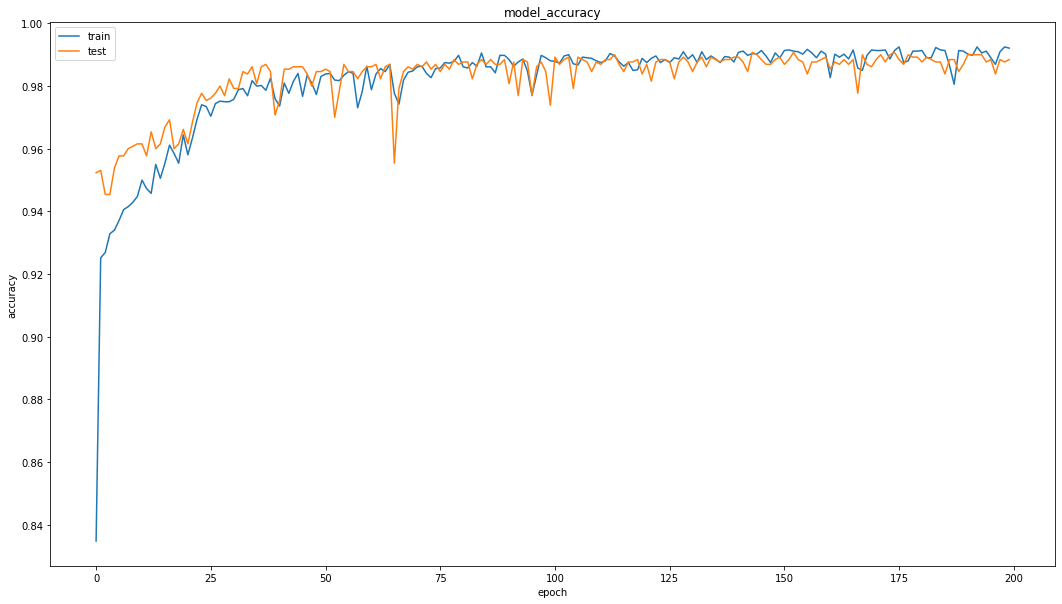

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

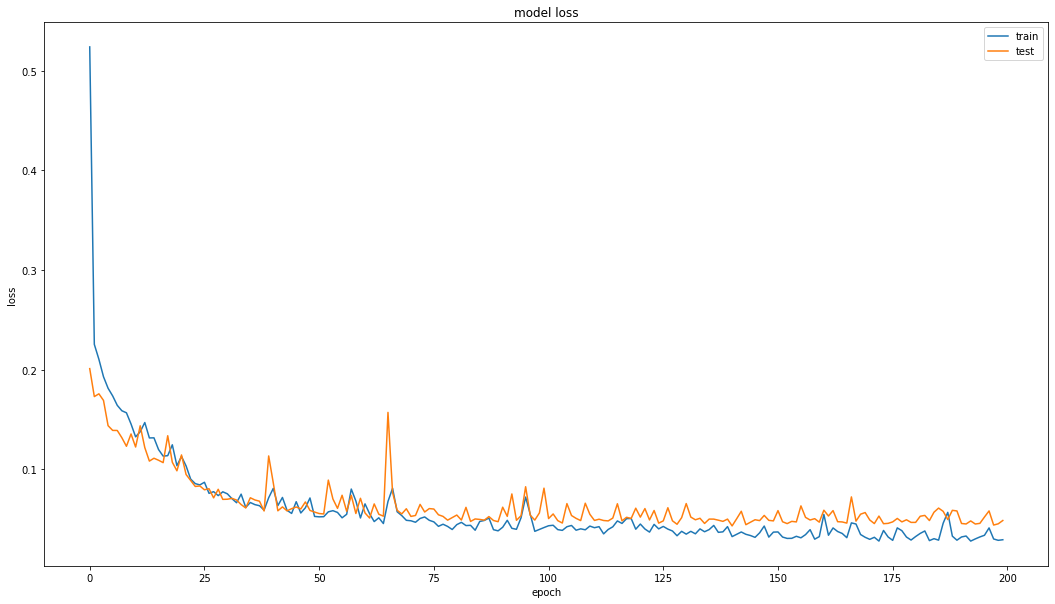

In [11]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [24]:
from keras.layers import Conv1D,MaxPooling1D,Flatten
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(12,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
import numpy as np
x =np.array(x_train).reshape(x_train.shape[0],x_train.shape[1],1)
y =np.array(y_train).reshape(y_train.shape[0],1)
x_ =np.array(x_test).reshape(x_test.shape[0],x_test.shape[1],1)
y_ =np.array(y_test).reshape(y_test.shape[0],1)

history = model.fit(x, y, epochs=200, validation_data=(x_, y_))

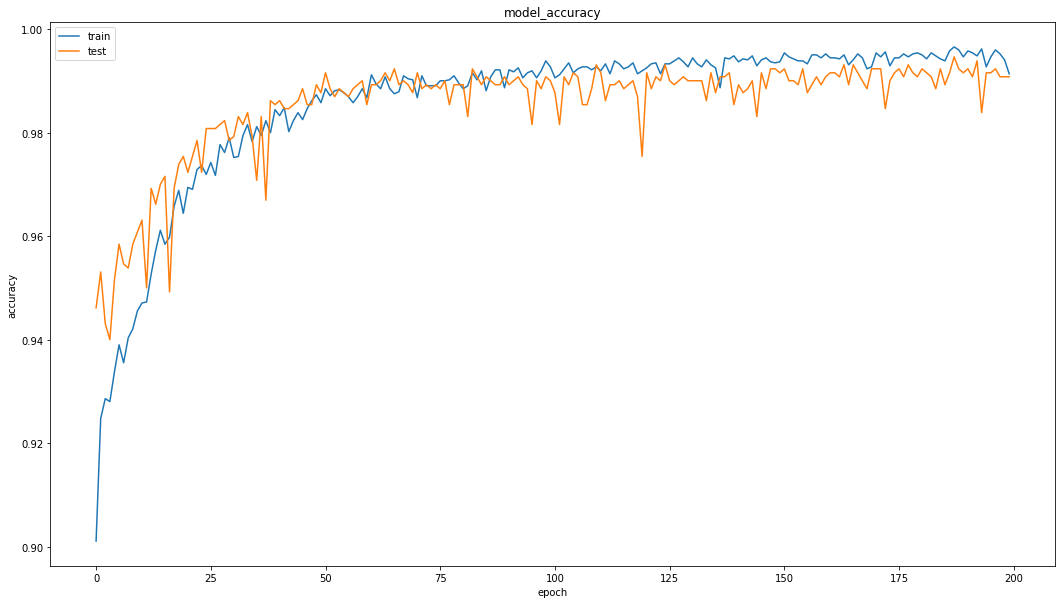

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()